In [0]:
#convert prob labels to binary
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dataset=pd.read_csv('/content/drive/My Drive/classifications.csv')

In [19]:
dataset.head()

,Unnamed: 0,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.0,00001cee341fdb12,0.995851,0.593064,0.987778,0.133256,0.961174,0.354693
1,1.0,0000247867823ef7,0.002321,0.000318,0.000820,0.000296,0.000637,0.000421
2,2.0,00013b17ad220c46,0.001767,0.000347,0.000777,0.000338,0.000615,0.000455
3,3.0,00017563c3f7919a,0.001383,0.000408,0.000745,0.000426,0.000644,0.000520
4,4.0,00017695ad8997eb,0.001872,0.000340,0.000739,0.000335,0.000630,0.000462


In [0]:
#removing the first column
dataset=dataset.iloc[:,1:]

In [21]:
dataset.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.995851,0.593064,0.987778,0.133256,0.961174,0.354693
1,0000247867823ef7,0.002321,0.000318,0.000820,0.000296,0.000637,0.000421
2,00013b17ad220c46,0.001767,0.000347,0.000777,0.000338,0.000615,0.000455
3,00017563c3f7919a,0.001383,0.000408,0.000745,0.000426,0.000644,0.000520
4,00017695ad8997eb,0.001872,0.000340,0.000739,0.000335,0.000630,0.000462


In [0]:
dataset['threshold'] = 0.5

dataset['toxic'] = dataset.apply(lambda x : 1 if x['toxic'] > x['threshold'] else 0, axis=1)
dataset['severe_toxic'] = dataset.apply(lambda x : 1 if x['severe_toxic'] > x['threshold'] else 0, axis=1)
dataset['obscene'] = dataset.apply(lambda x : 1 if x['obscene'] > x['threshold'] else 0, axis=1)
dataset['threat'] = dataset.apply(lambda x : 1 if x['threat'] > x['threshold'] else 0, axis=1)
dataset['insult'] = dataset.apply(lambda x : 1 if x['insult'] > x['threshold'] else 0, axis=1)
dataset['identity_hate'] = dataset.apply(lambda x : 1 if x['identity_hate'] > x['threshold'] else 0, axis=1)

In [0]:
dataset=dataset[['id','toxic','severe_toxic','obscene','threat','insult','identity_hate']]

In [24]:
print(dataset)

                      id  toxic  severe_toxic  ...  threat  insult  identity_hate
0       00001cee341fdb12      1             1  ...       0       1              0
1       0000247867823ef7      0             0  ...       0       0              0
2       00013b17ad220c46      0             0  ...       0       0              0
3       00017563c3f7919a      0             0  ...       0       0              0
4       00017695ad8997eb      0             0  ...       0       0              0
...                  ...    ...           ...  ...     ...     ...            ...
153159  fffcd0960ee309b5      1             0  ...       0       0              0
153160  fffd7a9a6eb32c16      0             0  ...       0       0              0
153161  fffda9e8d6fafa9e      0             0  ...       0       0              0
153162  fffe8f1340a79fc2      0             0  ...       0       0              0
153163  ffffce3fb183ee80      1             0  ...       0       1              0

[153164 rows x 

In [0]:
#available for download
dataset.to_csv('y_pred.csv')

In [27]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
data_path = "/content/drive/My Drive/dataset/train.csv"
data_raw = pd.read_csv(data_path).iloc[:,1:]
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
data_raw.head()

Number of rows in data = 159571
Number of columns in data = 7


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [34]:
categories = list(data_raw.columns.values)
categories = categories[1:]
print(categories)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [35]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


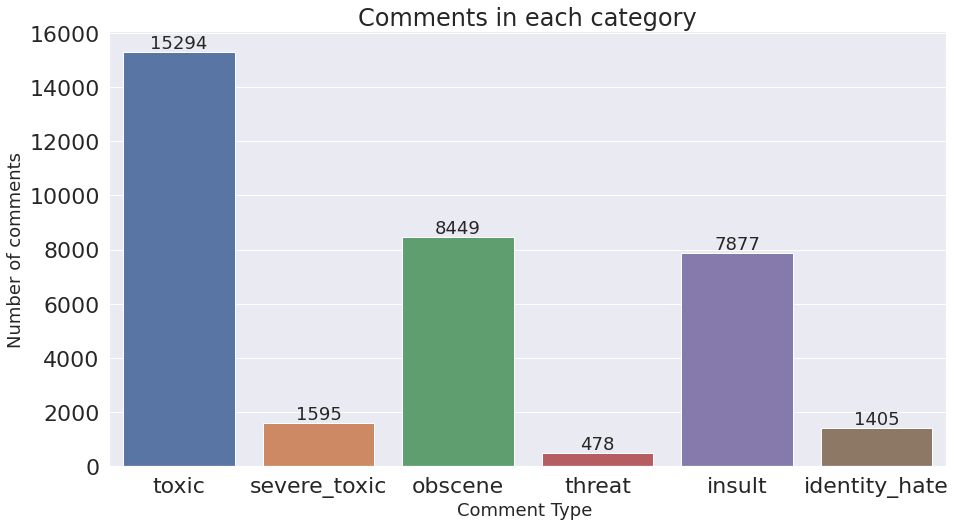

In [36]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data_raw.iloc[:,1:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,1:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

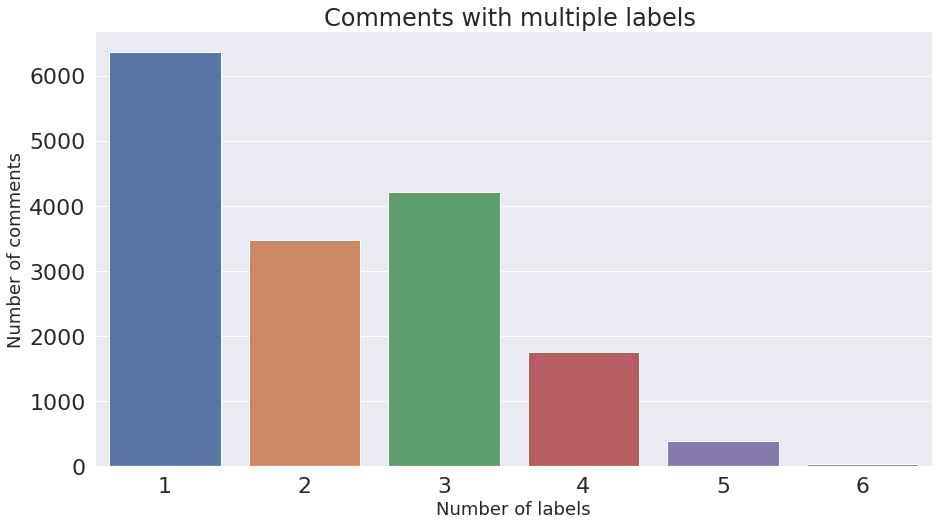

In [64]:
rowSums = data_raw.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments with multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height +5, label, ha='center', va='bottom')

plt.show()

In [65]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import numpy as np

# For each class
precision = dict()
recall = dict()
average_precision = dict()

Y_test=pd.read_csv('/content/drive/My Drive/dataset/test_labels.csv').iloc[:,2:]
Y_test.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,1,1,1,0,1,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [69]:
y_score=pd.read_csv('/content/drive/My Drive/classifications.csv').iloc[:,2:]#pd.read_csv('/content/y_pred_5.csv').iloc[:,2:]
y_score.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.995851,0.593064,0.987778,0.133256,0.961174,0.354693
1,0.002321,0.000318,0.000820,0.000296,0.000637,0.000421
2,0.001767,0.000347,0.000777,0.000338,0.000615,0.000455
3,0.001383,0.000408,0.000745,0.000426,0.000644,0.000520
4,0.001872,0.000340,0.000739,0.000335,0.000630,0.000462


In [0]:
n_classes=6

In [70]:

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test.iloc[:, i],
                                                        y_score.iloc[:, i])
    average_precision[i] = average_precision_score(Y_test.iloc[:, i], y_score.iloc[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.values.ravel(),
    y_score.values.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))


Average precision score, micro-averaged over all classes: 0.96


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.96')

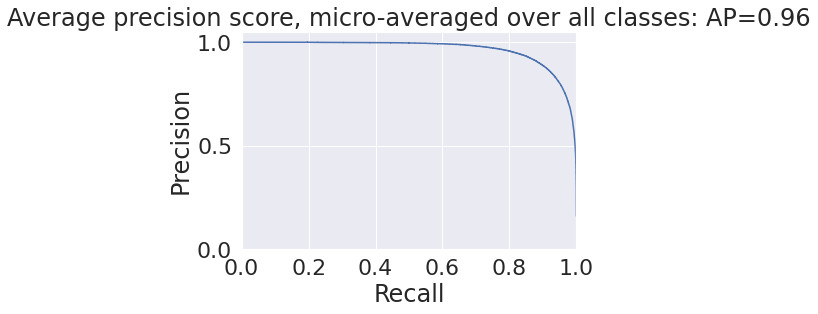

In [71]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

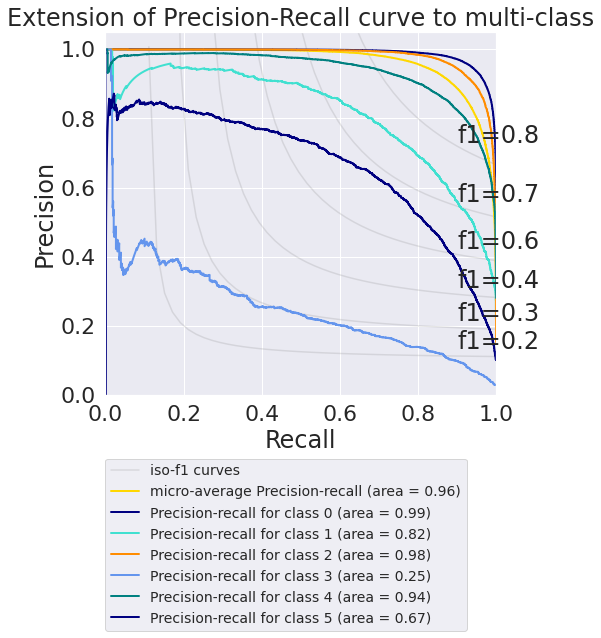

In [95]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=6)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -0.65), prop=dict(size=14))


plt.show()

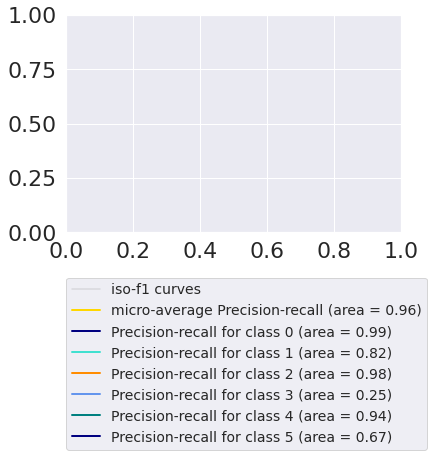

In [0]:

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.metrics import Metric
from tensorflow_addons.metrics.utils import MeanMetricWrapper

In [0]:
y_true=Y_test
y_pred=pd.read_csv('/content/y_pred.csv')

In [78]:
print(len(y_true),len(y_pred))

153164 153164


In [81]:
y_pred.head()

,Unnamed: 0,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,00001cee341fdb12,1,1,1,0,1,0
1,1,0000247867823ef7,0,0,0,0,0,0
2,2,00013b17ad220c46,0,0,0,0,0,0
3,3,00017563c3f7919a,0,0,0,0,0,0
4,4,00017695ad8997eb,0,0,0,0,0,0


In [82]:
y_true.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,1,1,1,0,1,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [0]:
pred_list=[]
true_list=[]
for i in range(len(y_pred)):
    pred_list.append(list(y_pred.iloc[i][2:]))
    true_list.append(list(y_true.iloc[i]))

In [86]:
hl = tfa.metrics.HammingLoss(mode='multilabel', threshold=0.8)
actuals = tf.constant(true_list, dtype=tf.int32)
predictions = tf.constant(pred_list,
                           dtype=tf.int32)
hl.update_state(actuals, predictions)
print('Hamming loss: ', hl.result().numpy())

Hamming loss:  0.01841164


In [84]:
true,false=0,0

for i in range(len(y_pred)):
    ypred=list(y_pred.iloc[i][2:])
    ytrue=list(y_true.iloc[i])
    if ypred==ytrue:
      true+=1
    else:
      false+=1
print(true, false)
    

137837 15327


In [85]:
print(true/(true+false))

0.8999307931367684
